In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

from matplotlib.lines import Line2D
import ipywidgets as widgets
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker


In [2]:
# #數值設定  
# gamma = 1.47 #eV*angstrom

In [3]:
def tau(l, tau_0):
    l = np.abs(l)
    Tau = tau_0 / (np.abs(l)+1)
    return Tau

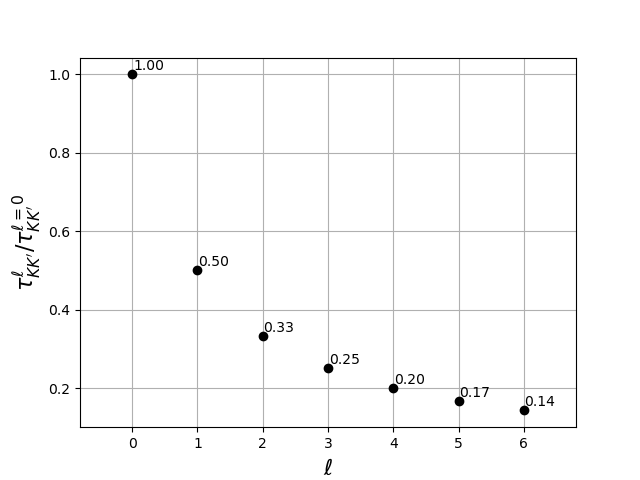

In [4]:
fig, ax = plt.subplots()
tau_0=1
taul = []
for l in range(0,7,1):
    taul += [tau(l, tau_0)]

ax.plot( np.arange(0,7,1), taul, 'o',color='black' )
for i, v in enumerate(taul):
        ax.text(i+0.25, v+0.01, "%2.2f" %v, ha="center")    
    
ax.grid()
ax.set_xlabel('$\ell$', fontsize=16)
ax.set_ylabel('$τ_{KK\'}^{\ell}/τ_{KK\'}^{\ell=0}$', fontsize=16)
ax.set_xlim(-0.8, 6.8)
plt.show()

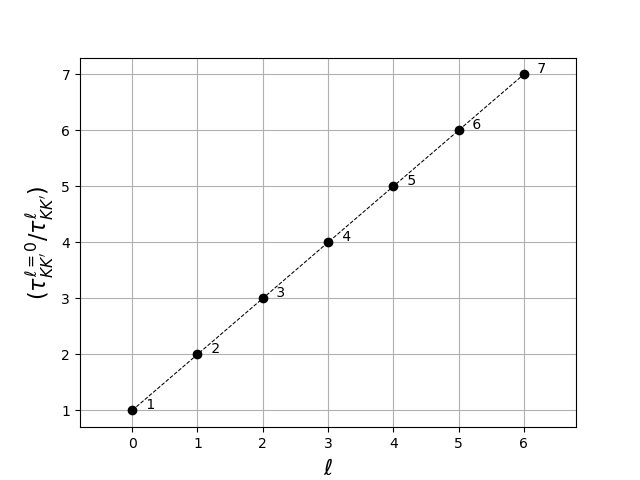

In [5]:
fig, ax = plt.subplots()
tau_0=1
taul = []
for l in range(0,7,1):
    taul += [1/tau(l, tau_0)]

ax.plot( np.arange(0,7,1), taul, marker='o', linestyle='dashed',linewidth=0.75,color='black' )
for i, v in enumerate(taul):
        ax.text(i+0.25, v+0.03, "%2.0f" %v, ha="center")    
    
ax.grid()
ax.set_xlabel('$\ell$', fontsize=16)
ax.set_ylabel('($τ_{KK\'}^{\ell=0}/τ_{KK\'}^{\ell})$', fontsize=16)
ax.set_xlim(-0.8, 6.8)
plt.show()

In [8]:
def Both_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    Both = (1+2*y_x0_KK/(y_x_r+y_x_f))/(1+2*y_x0_KK/y_x_r) / (1+2*y_l0_KK/(y_x_r+y_x_f))
    return Both

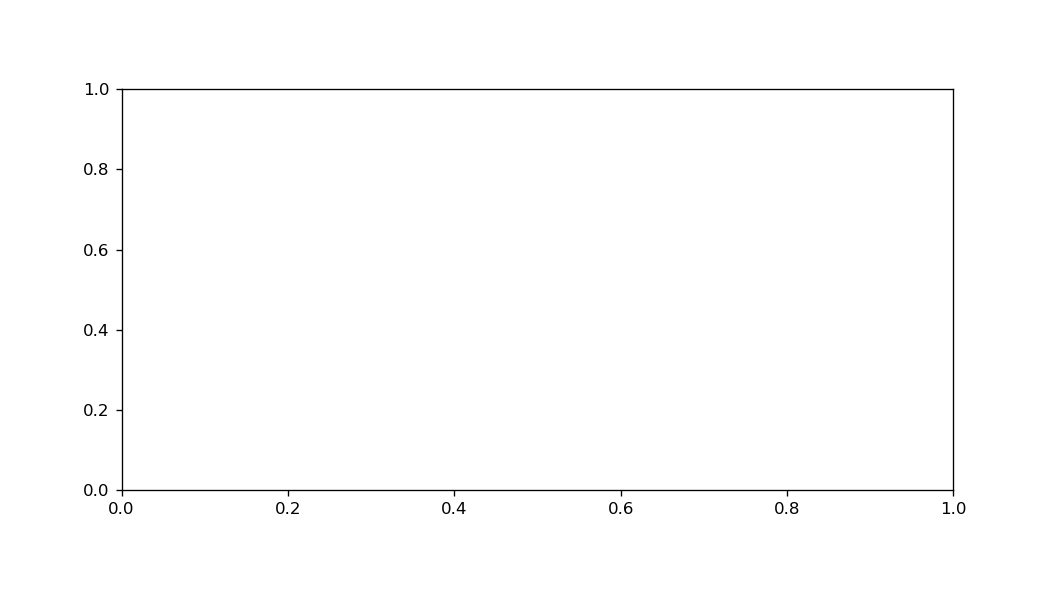

Output()

In [47]:
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_x0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_x0_KK_multiplier')
y_x_r = 1

Linestyle = ['solid', 'dashed', 'dotted']
# t_thmulti = [0.05, 0.1, 1]
y_x_fmulti = 10
    
def need(y_l0_KKmulti,y_x0_KKmulti):
    ax.cla()
    
    y_l0_KK = y_l0_KKmulti * y_x_r
    y_x0_KK = y_x0_KKmulti * y_x_r
    y_x_f   = y_x_fmulti   * y_x_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_x0_KK = "+str(format(y_x0_KK,'.2f')))
    print("y_x_f = "+str(format(y_x_f,'.2f')))

    globals()['Both'] = []
    for l in range(0,7,1):
        globals()['Both'] += [Both_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f)]

    ax.plot( np.linspace(0, 6, 7), globals()['Both'], marker='v', linestyle='solid', markersize=8, color='black' ,linewidth=1, zorder=2)


    for j, v in enumerate(globals()['Both']):
        ax.text(j, v+0.01, "%2.2f" %v, ha="center", fontsize=20)

    ax.grid()
    # ax.set_title('Model I', fontsize=20)
    ax.set_ylabel("Exciton DoVP", fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    # ax.set_ylim(0.67, 0.86)
    # ax.set_ylim(0.60, 0.95)
    ax.set_ylim(0.58, 0.95)
    # ax.set_xlabel('$\ell$', fontsize=20)
    ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    # ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.legend(['η$^\ell_{X}$(Model I)'], fontsize=16, loc='lower left')


        
plt.tight_layout(pad=5)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti,'y_x0_KKmulti':y_x0_KKmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti,y_x0_KKmulti]) ])
display(ui , out )

In [30]:
def WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    WP_TH = (1+2*y_X0_KK/(y_T_f+y_x_r+y_X_f))/(1+2*y_X0_KK/(y_T_f+y_x_r)) / (1+2*y_l0_KK/(y_T_f+y_x_r+y_X_f))
    return WP_TH

def onlyTR_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r):
    onlyTR = WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f) * (1/(1+2*y_T_KK/y_T_r))
    return onlyTR

def All_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r):
    All    = WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f) * (1+2*y_T_KK/(y_T_r*(1+y_T_f/y_X_r))) / (1+2*y_T_KK/y_T_r)
    return All


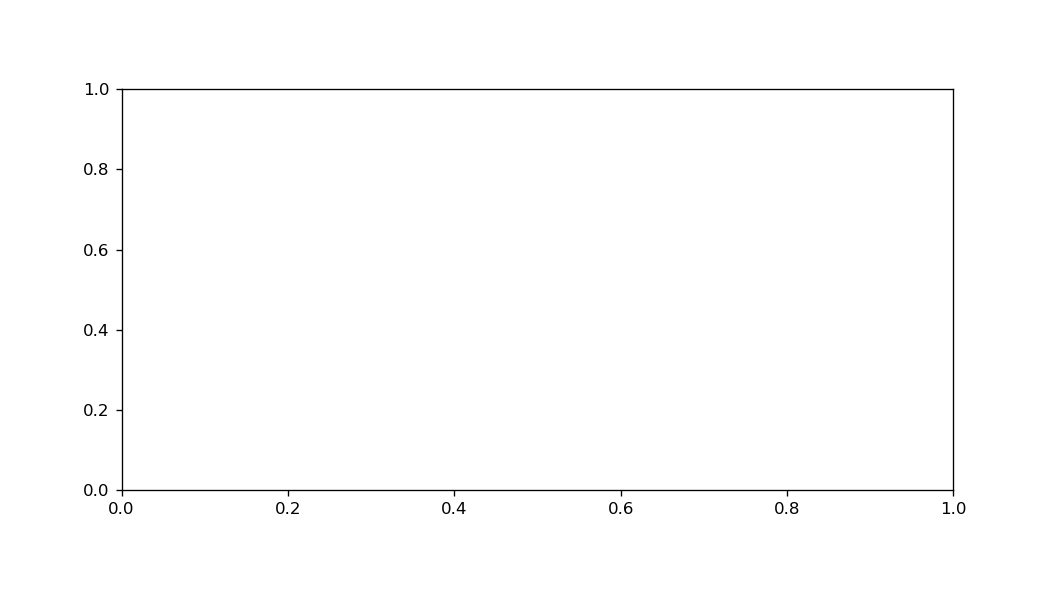

Output()

In [49]:
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# GK = 1
# GKprime = 0
# Gratio_term = (GK-GKprime)/(GK+GKprime)

    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.2f')))
    print("y_T_r = "+str(format(y_T_r,'.2f')))
    
    
    ax.cla()
    globals()['WP_and_TH'] = []
    globals()['onlyTR'] = []
    globals()['All'] = []
    for l in range(0,7,1):
        globals()['WP_and_TH'] += [WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f)]
        globals()['onlyTR']    += [onlyTR_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r)]
        globals()['All']       += [All_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r)]

    

    ax.plot( np.linspace(0, 6, 7), globals()['WP_and_TH'], marker='v', linestyle='solid', markersize=8, color='magenta' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['All'], marker='s', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['onlyTR'], marker='o', linestyle='dotted', markersize=8, color='mediumseagreen' ,linewidth=1, zorder=2)
    for j, v in enumerate(globals()['WP_and_TH']):
        ax.text(j, v+0.01, "%2.2f" %v, ha="center", fontsize=20)
    for j, v in enumerate(globals()['All']):
        ax.text(j, v+0.01, "%2.2f" %v, ha="center", fontsize=20)
    for j, v in enumerate(globals()['onlyTR']):
        ax.text(j, v+0.01, "%2.2f" %v, ha="center", fontsize=20)
  
    ax.grid()
    # ax.set_title('η ', fontsize=16)
    # ax.set_title('Exciton DoVP', fontsize=16)
    # ax.set_title('Model II', fontsize=20)
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    # ax.set_ylabel('η$_{T}$(%)', fontsize=16, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0.45, 0.95)
    # ax.set_yticks(np.arange(-100, 1, 100/10))
    # ax.set_yticks(np.arange(-100, 1, 100/100), minor=True)
    # ax.set_ylim(-105, 0)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(-0.1, 6.7)
    ax.legend(['η$^\ell_{X}$(Model II)', 'η$^\ell_{tot}$(Model II)', 'η$^\ell_{T}$(Model II)'], fontsize=16, loc='lower left')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

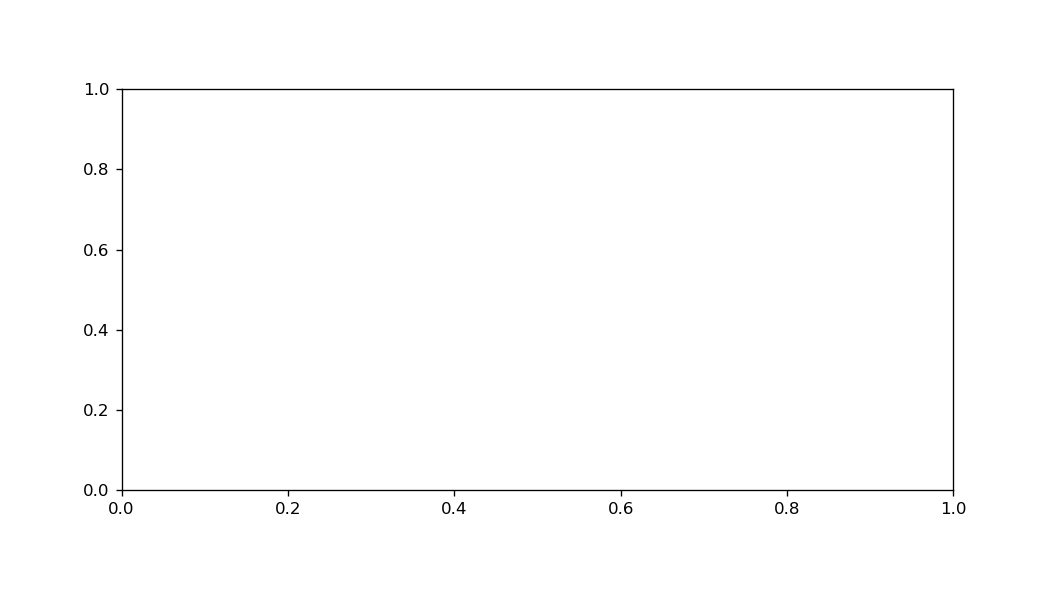

Output()

In [104]:
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

tau_l0_KKmulti = widgets.FloatSlider(value=16, min=0., max=100, step=1/10001 ,layout=widgets.Layout(width='75%'), description='tau_l0_KK_multiplier')
tau_th_KKmulti = widgets.FloatSlider(value=16, min=0., max=100, step=1/10001 ,layout=widgets.Layout(width='75%'), description='tau_th_KK_multiplier')
t_thmulti     = widgets.FloatSlider(value=0.1, min=0., max=0.5,  step=1/10001  ,layout=widgets.Layout(width='75%'), description='t_th_multiplier')
t_fmulti      = widgets.FloatSlider(value=1,   min=0., max=10, step=1/10001  ,layout=widgets.Layout(width='75%'), description='t_fmultiplier')
tau_T_KKmulti = widgets.FloatSlider(value=200, min=100, max=350, step=1/10001 ,layout=widgets.Layout(width='75%'), description='tau_T_KK_multiplier')
t_tmulti      = widgets.FloatSlider(value=10,  min=0., max=50, step=1/10001  ,layout=widgets.Layout(width='75%'), description='t_t_multiplier')

t_r = 1

GK = []
GKprime = []
GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
Gratio = []
for i in range(13):
    Gratio += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i])]
    # Gratio += [(GKprimeinLCP[i]-GKinLCP[i])/(GKprimeinLCP[i]+GKinLCP[i])]
    # Gratio += [1]
    
def need(tau_l0_KKmulti, t_thmulti, t_fmulti, tau_th_KKmulti, t_tmulti, tau_T_KKmulti):

    tau_l0_KK = tau_l0_KKmulti*t_r
    print("tau_l0_KK = "+str(format(tau_l0_KK,'.2f')))
    tau_th_KK = tau_th_KKmulti*t_r
    print("tau_th_KK = "+str(format(tau_th_KK,'.2f')))
    t_th = t_thmulti*t_r
    print("t_th = "+str(format(t_th,'.2f')))
    t_f = t_fmulti*t_r
    print("t_f = "+str(format(t_f,'.2f')))
    tau_T_KK  = tau_T_KKmulti*t_r
    print("tau_T_KK = "+str(format(tau_T_KK,'.2f')))
    t_t      = t_tmulti*t_r
    print("t_t = "+str(format(t_t,'.2f')))
    
    beta = 1/(1+t_r/t_f+2*t_r/tau_th_KK)
    print("beta = ", beta)
    
    y_l0_KK = beta*t_r/tau_l0_KK
    y_th_KK = beta*t_r/tau_th_KK
    y_x_th  = beta*t_r/t_th
    y_f = beta*t_r/t_f
    y_T_KK  = beta*t_r/tau_T_KK
    y_t = beta*t_r/t_t
    
    ax.cla()
    globals()['WP_and_TH'] = []
    globals()['onlyTR'] = []
    globals()['All'] = []
    for l in range(-6,7,1):
        globals()['WP_and_TH'] += [WP_and_TH_fun(l, beta, y_x_th, y_l0_KK, y_th_KK, y_f)*Gratio[l+6]]
        globals()['onlyTR']    += [onlyTR_fun(l, beta, y_x_th, y_l0_KK, y_th_KK, y_f, y_T_KK, y_t)*Gratio[l+6]]
        globals()['All']       += [All_fun(l, beta, y_x_th, y_l0_KK, y_th_KK, y_f, y_T_KK, y_t)*Gratio[l+6]]

    

    # ax.plot( np.linspace(-6, 6, 13), globals()['WP_and_TH'], marker='v', linestyle='dashed', markersize=8, color='magenta' ,linewidth=1, zorder=2)
    # ax.plot( np.linspace(-6, 6, 13), globals()['All'], marker='s', linestyle='solid', markersize=8, color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['onlyTR'], marker='^', linestyle='dotted', markersize=8, color='mediumseagreen' ,linewidth=1, zorder=2)
    
    # for j, v in enumerate(globals()['WP_and_TH']):
        # ax.text(j-6, v+0.01, "%2.2f" %v, ha="center", fontsize=16)
    # for j, v in enumerate(globals()['All']):
        # ax.text(j-6, v+0.01, "%2.2f" %v, ha="center", fontsize=16)
    for j, v in enumerate(globals()['onlyTR']):
        ax.text(j-6, v+0.01, "%2.3f" %v, ha="center", fontsize=16)
  
    ax.grid()
    ax.set_title('Model III', fontsize=20)
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    # ax.set_ylabel('η$_{T}$(%)', fontsize=16, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./50))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0.74, 0.88)
    # ax.set_yticks(np.arange(-100, 1, 100/10))
    # ax.set_yticks(np.arange(-100, 1, 100/100), minor=True)
    # ax.set_ylim(-105, 0)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
    ax.set_xlim(-6.7, 6.7)
    ax.legend(['η$^\ell_{X}$', 'η$^\ell_{tot}$', 'η$^\ell_{T}$'], fontsize=16, loc='lower left')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'tau_l0_KKmulti':tau_l0_KKmulti, 't_thmulti':t_thmulti, 't_fmulti':t_fmulti, 'tau_th_KKmulti':tau_th_KKmulti, 't_tmulti':t_tmulti, 'tau_T_KKmulti':tau_T_KKmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([tau_l0_KKmulti, t_thmulti, t_fmulti, tau_th_KKmulti, t_tmulti, tau_T_KKmulti]) ])
display(ui , out )